# Network Optimization
    Optimizing a network's virtual backbone using Graph Theory

## Import Tools

### Import Graph Tool Modules
    Specifically graph_tool main, draw and collection modules

In [1]:
import graph_tool.all
import graph_tool as gt
import graph_tool.draw
import graph_tool.collection

/home/achal/.virtualenvs/network/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Import Other Required Modules
    These Modules include Matplotlib

In [2]:
import matplotlib as mpl

In [3]:
%matplotlib inline

In [4]:
import _pickle as pickle

In [5]:
from tqdm import tqdm_notebook as tqdm

## Algorithms

### Exact Exponential Algorithms

#### Minimum Dominating Set
    A bitmask approach to compute the minimum dominating set of a graph

In [43]:
def min_dominating_set(graph):
    vertices = list(graph.vertices())
    vertex_neighbours_dict = {}

    for vertex in graph.vertices():
        vertex_neighbours = set(vertex.out_neighbors())
        vertex_neighbours.add(vertex)
        vertex_neighbours_dict[vertex] = vertex_neighbours

    min_dominating_set = set(vertices)

    for i in tqdm(range(2**(len(vertices)))):
        dominated = set()
        dominating = set()
        for j in range(len(vertices)):
            if not i&(1<<j):
                continue
            dominating.add(vertices[j])
            if len(dominating) >= len(min_dominating_set):
                break
            dominated = dominated.union(vertex_neighbours_dict[vertices[j]])
            if len(dominated) == len(vertices):
                min_dominating_set = dominating
                break
    
    dominated_property_map = graph.new_vertex_property("bool")
    dominated_property_map.set_value(0)
    for vertex in min_dominating_set:
        dominated_property_map[vertex] = 1
    
    return dominated_property_map

In [44]:
def min_connected_dominating_set(graph):
    vertices = list(graph.vertices())
    vertex_neighbours_dict = {}

    for vertex in graph.vertices():
        vertex_neighbours = set(vertex.out_neighbors())
        vertex_neighbours.add(vertex)
        vertex_neighbours_dict[vertex] = vertex_neighbours

    min_dominating_set = set(vertices)

    for i in tqdm(range(2**(len(vertices)))):
        dominated = set()
        dominating = set()
        for j in range(len(vertices)):
            if not i&(1<<j):
                continue
            if j>0 and not vertices[j] in dominated:
                continue
                
            dominating.add(vertices[j])
            
            if len(dominating) >= len(min_dominating_set):
                break
            dominated = dominated.union(vertex_neighbours_dict[vertices[j]])
            if len(dominated) == len(vertices):
                min_dominating_set = dominating
                break
    
    dominated_property_map = graph.new_vertex_property("bool")
    dominated_property_map.set_value(0)
    for vertex in min_dominating_set:
        dominated_property_map[vertex] = 1
    
    return dominated_property_map

### Heuristic Approximate Algorithms

#### Minimum Dominating Set
    A Greedy approach for computing the minimum dominating set of an undirected graph

In [8]:
def min_dominating_set(graph):
#     import pdb; pdb.set_trace()
    dominated_set = set()
    dominating_set = set()
    vertex_neighbours_dict = {}
#     total_vertices = len(graph.vertices())
    
    for vertex in graph.vertices():
        vertex_neighbours = set(vertex.out_neighbors())
        vertex_neighbours.add(vertex)
        vertex_neighbours_dict[vertex] = vertex_neighbours
    
#     print(vertex_neighbours_dict)
    
    def get_max_potential_vertex():
        max_potential = 0
        max_p_vertex = None
        for vertex, neighbours in vertex_neighbours_dict.items():
            if len(neighbours) > max_potential:
                max_potential = len(neighbours)
                max_p_vertex = vertex
        return max_p_vertex
    
    while vertex_neighbours_dict:
        current_vertex = get_max_potential_vertex()
#         print("The current vertex is", current_vertex)
#         print("The current dominated set is", dominated_set)
#         print("The neighbours not dominated yet for the current vertex is", vertex_neighbours_dict[current_vertex])
        current_vertex_neighbours = vertex_neighbours_dict.pop(current_vertex, None)
#         print("Recheck", current_vertex_neighbours)
        dominated_set = dominated_set.union(current_vertex_neighbours)
        dominating_set.add(current_vertex)
        to_delete = set()
        for vertex, neighbours in vertex_neighbours_dict.items():
            neighbours = neighbours.difference(current_vertex_neighbours)
            vertex_neighbours_dict[vertex] = neighbours
            if not neighbours:
                to_delete.add(vertex)
        for vertex in to_delete:
            vertex_neighbours_dict.pop(vertex)
        
    
    dominated_property_map = graph.new_vertex_property("bool")
    dominated_property_map.set_value(0)
    for vertex in dominating_set:
        dominated_property_map[vertex] = 1
    
    return dominated_property_map
        

#### Minimum Connected Dominating Set
    A Greedy approach to compute the minimum connected dominating set of a graph

In [9]:
def min_connected_dominating_set(graph):
    dominated_set = set()
    dominating_set = set()
    vertex_neighbours_dict = {}
    possible_vertex_options = set()
    
    for vertex in graph.vertices():
        vertex_neighbours = set(vertex.out_neighbors())
        vertex_neighbours.add(vertex)
        vertex_neighbours_dict[vertex] = vertex_neighbours
    
    
    def get_max_potential_vertex(iterable):
        max_potential = 0
        max_p_vertex = None
        for vertex in iterable:
            neighbours = vertex_neighbours_dict.get(vertex, [])
            if len(neighbours) > max_potential:
                max_potential = len(neighbours)
                max_p_vertex = vertex
        return max_p_vertex
    
    first_vertex = get_max_potential_vertex(vertex_neighbours_dict.keys())
    possible_vertex_options.add(first_vertex)
    
    
    
    while possible_vertex_options:
        current_vertex = get_max_potential_vertex(possible_vertex_options)
        if not current_vertex:
            break
        possible_vertex_options.remove(current_vertex)
        to_delete = set()
        current_vertex_neighbours = vertex_neighbours_dict.pop(current_vertex, set())
        possible_vertex_options = possible_vertex_options.union(current_vertex_neighbours)
        dominated_set = dominated_set.union(current_vertex_neighbours)
        dominating_set.add(current_vertex)
        for vertex, neighbours in vertex_neighbours_dict.items():
            neighbours = neighbours.difference(current_vertex_neighbours)
            vertex_neighbours_dict[vertex] = neighbours
            if not neighbours:
                to_delete.add(vertex)
        for vertex in to_delete:
            vertex_neighbours_dict.pop(vertex)
        
    dominated_property_map = graph.new_vertex_property("bool")
    dominated_property_map.set_value(0)
    for vertex in dominating_set:
        dominated_property_map[vertex] = 1
    
    return dominated_property_map
        
    

## Sample Graphs

### Library Collections

#### List of available graphs

In [10]:
list(gt.collection.data.keys())

['as-22july06',
 'celegansneural',
 'polblogs',
 'football',
 'cond-mat-2003',
 'polbooks',
 'karate',
 'dolphins',
 'cond-mat-2005',
 'power',
 'astro-ph',
 'netscience',
 'hep-th',
 'serengeti-foodweb',
 'pgp-strong-2009',
 'cond-mat',
 'email-Enron',
 'lesmis',
 'adjnoun']

##### Visualise Graph

In [11]:
# select graph from library collection
graph = gt.collection.data["football"]

In [12]:
# uniform position 
pos = gt.draw.sfdp_layout(graph)

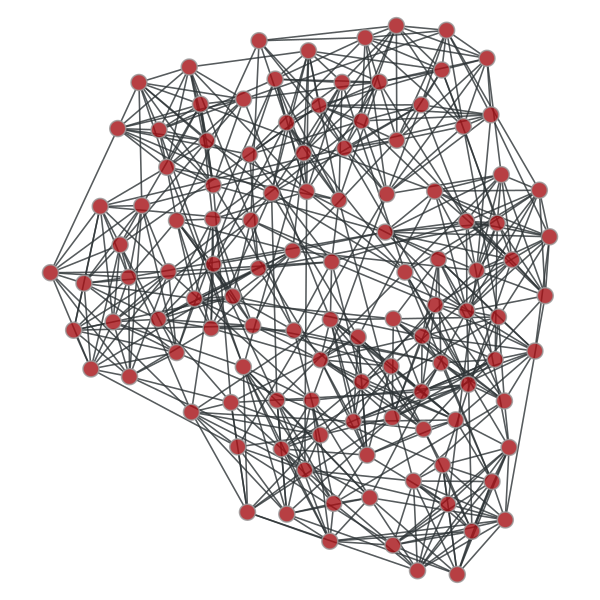

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f37e10, at 0x7f5e34f410f0>

In [13]:
gt.draw.graph_draw(graph, pos=pos)

##### Minimum Dominating Set

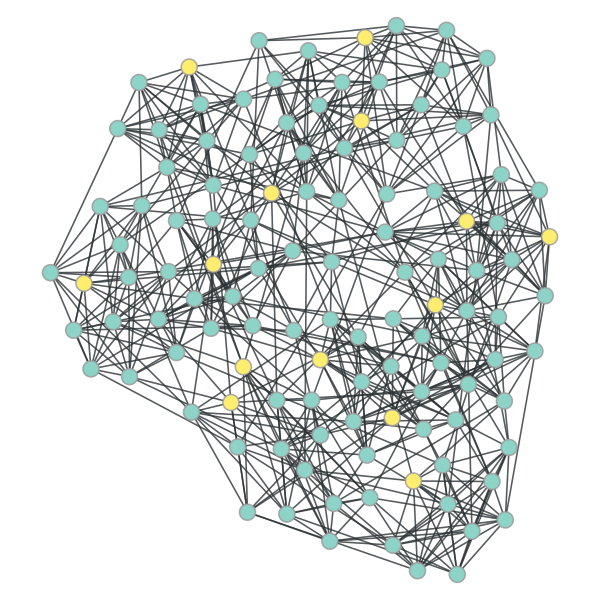

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f37e10, at 0x7f5e34f410f0>

In [14]:
gt.draw.graph_draw(graph, vertex_fill_color=min_dominating_set(graph), pos=pos)

##### Minimum Connected Dominating Set

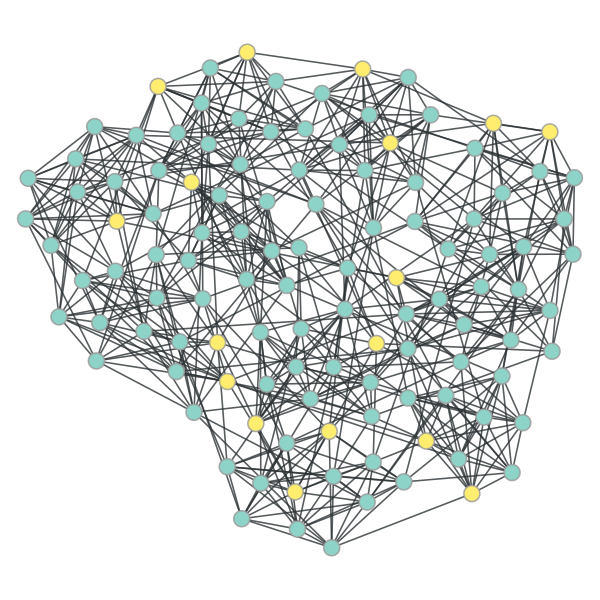

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f37e10, at 0x7f5e9820b400>

In [15]:
gt.draw.graph_draw(graph, vertex_fill_color=min_connected_dominating_set(graph))

### Custom Graphs

#### Lattice Graph

##### Visualize Graph

In [16]:
graph = gt.generation.lattice([5,5,5], periodic=False)

In [17]:
pos = gt.draw.sfdp_layout(graph)

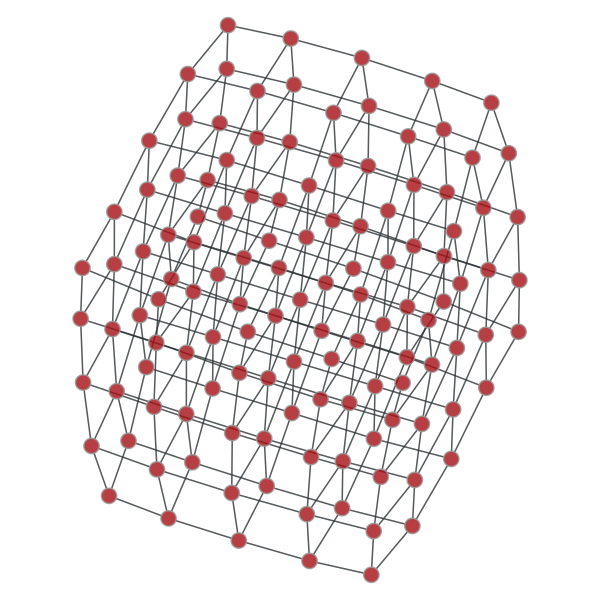

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f41c88, at 0x7f5e34f7a4a8>

In [18]:
gt.draw.graph_draw(graph, pos=pos)

##### Minimum Dominating Set

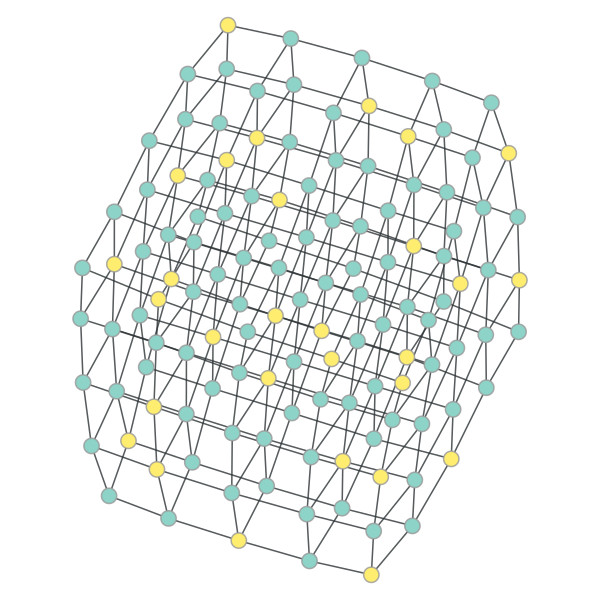

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f41c88, at 0x7f5e34f7a4a8>

In [19]:
gt.draw.graph_draw(graph, pos=pos, vertex_fill_color=min_dominating_set(graph) )

##### Minimum Connected Dominating Set

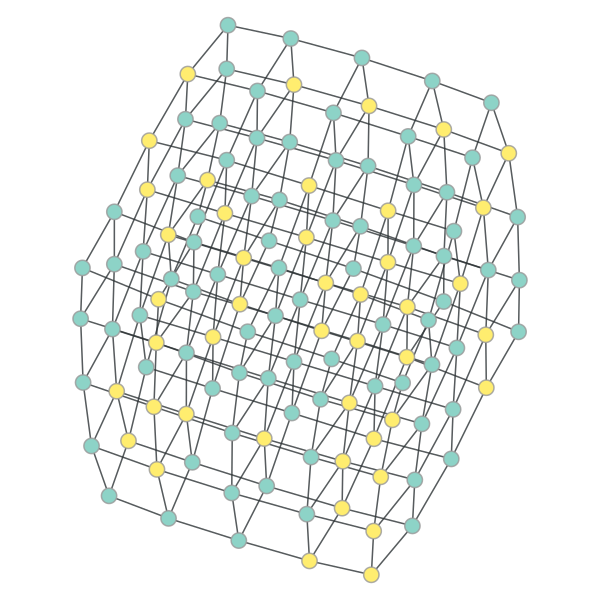

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f41c88, at 0x7f5e34f7a4a8>

In [20]:
gt.draw.graph_draw(graph, pos=pos, vertex_fill_color=min_connected_dominating_set(graph))

#### Random Graph

In [21]:
# limit 10
from random import random as random_number
def random_degree_sampler():
    return int((random_number()*10) +2)

##### Visualize Graph

In [22]:
graph = gt.generation.random_graph(N=200, deg_sampler=random_degree_sampler, directed=False, verbose=True )

In [23]:
pos = gt.draw.sfdp_layout(graph)

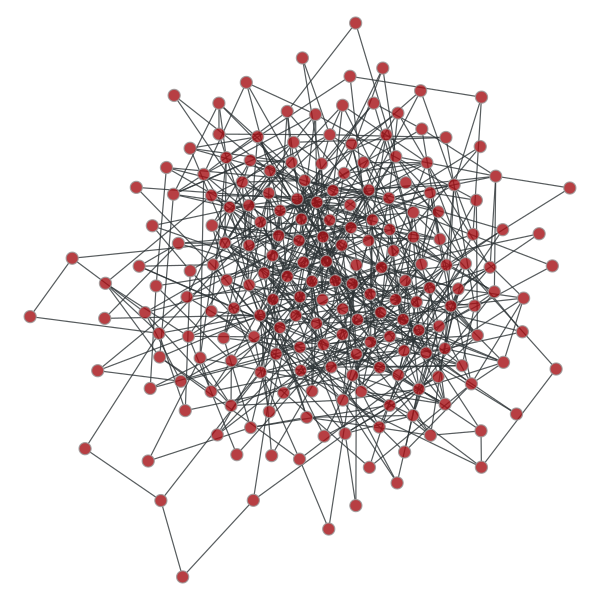

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45550, at 0x7f5e34f41cf8>

In [24]:
gt.draw.graph_draw(graph, pos=pos)

##### Minimum Dominating Set

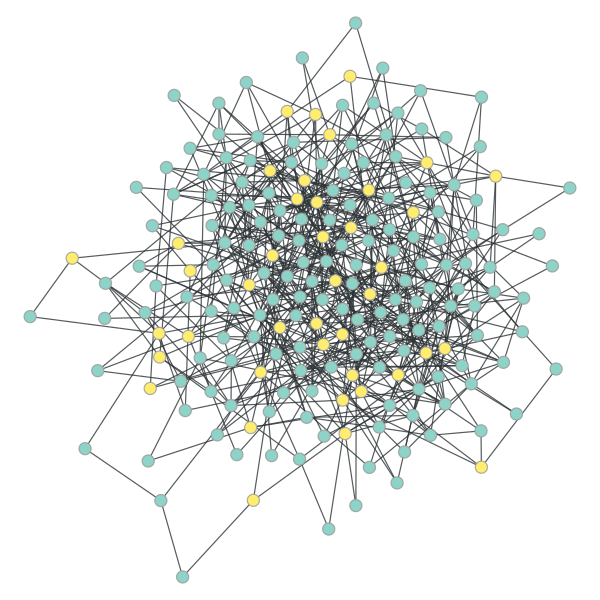

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45550, at 0x7f5e34f41cf8>

In [25]:
gt.draw.graph_draw(graph, pos=pos, vertex_fill_color=min_dominating_set(graph))

##### Minimum Connected Dominating Set

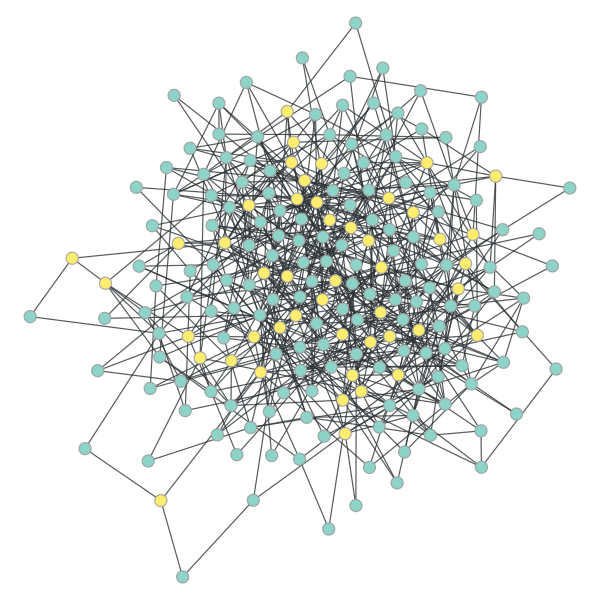

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45550, at 0x7f5e34f41cf8>

In [26]:
gt.draw.graph_draw(graph, pos=pos, vertex_fill_color=min_connected_dominating_set(graph))

#### Circular Graph

##### Visualize Graph

In [27]:
graph = gt.generation.circular_graph(N=24, directed=False, k=1)

In [28]:
pos = gt.draw.sfdp_layout(graph)

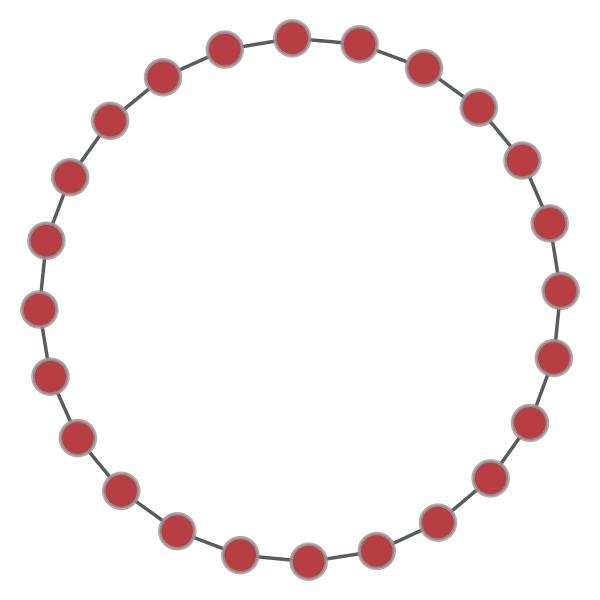

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45908, at 0x7f5e34f45a20>

In [29]:
gt.draw.graph_draw(graph, pos=pos)

##### Minimum Dominating Set

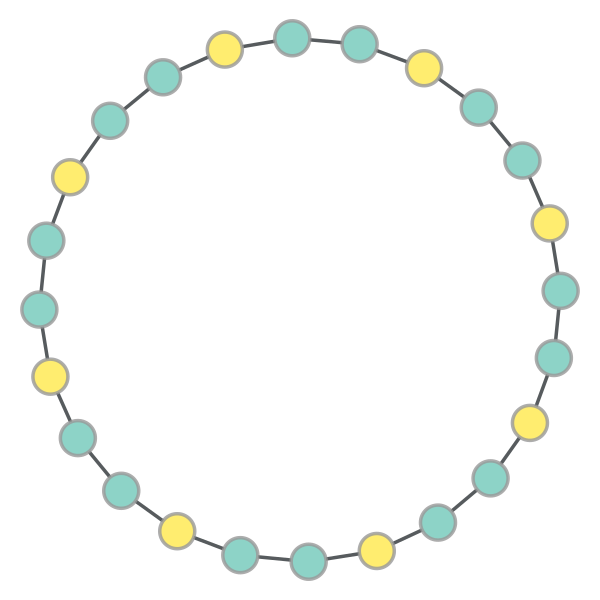

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45908, at 0x7f5e34f45a20>

In [30]:
gt.draw.graph_draw(graph, pos=pos, vertex_fill_color=min_dominating_set(graph))

In [31]:
# gt.draw.GraphWidget(graph, pos=pos, vertex_fill_color=min_dominating_set(graph))

##### Minimum Connected Dominating Set

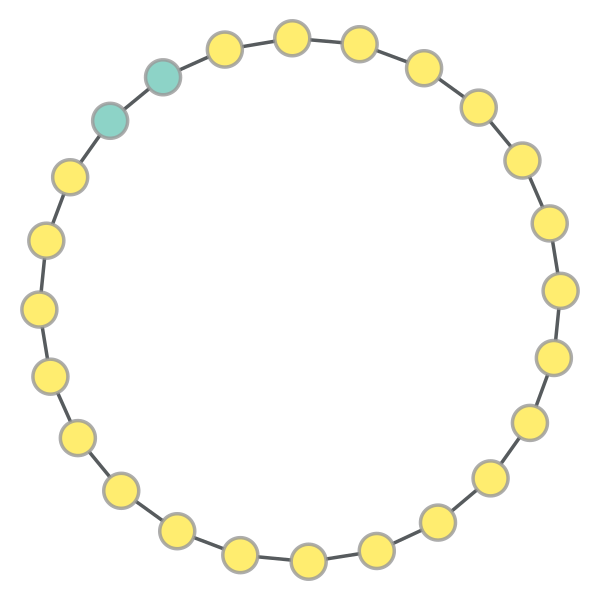

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45908, at 0x7f5e34f45a20>

In [32]:
gt.draw.graph_draw(graph, pos=pos, vertex_fill_color=min_connected_dominating_set(graph))

### Counter Example Graphs

#### Greedy Heuristic Algorithms

In [33]:
# with open('counter_example_greedy_heuristic.pickle', 'wb') as f:
#     pickle.dump(save_counter_example_graph_1, f)

In [34]:
with open('counter_example_greedy_heuristic.pickle', 'rb') as f:
    graph = pickle.load(f)

In [35]:
pos = gt.draw.sfdp_layout(graph)

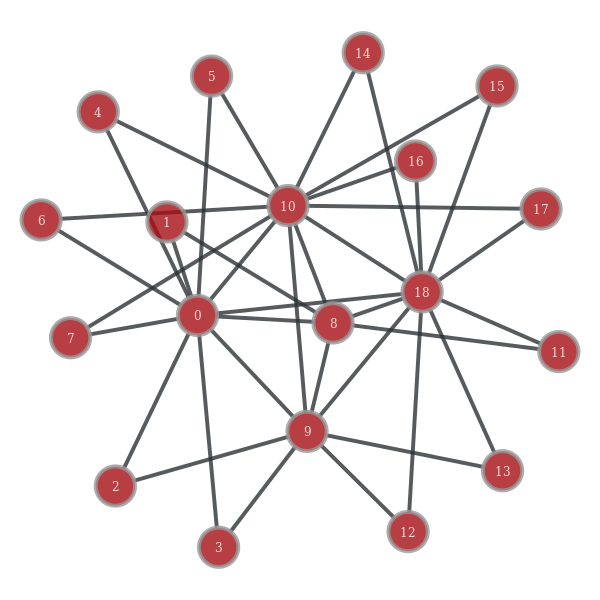

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45e80, at 0x7f5e34f455c0>

In [36]:
gt.draw.graph_draw(graph,  vertex_text=graph.vertex_index, pos=pos)

##### Approximate Algorithm Results

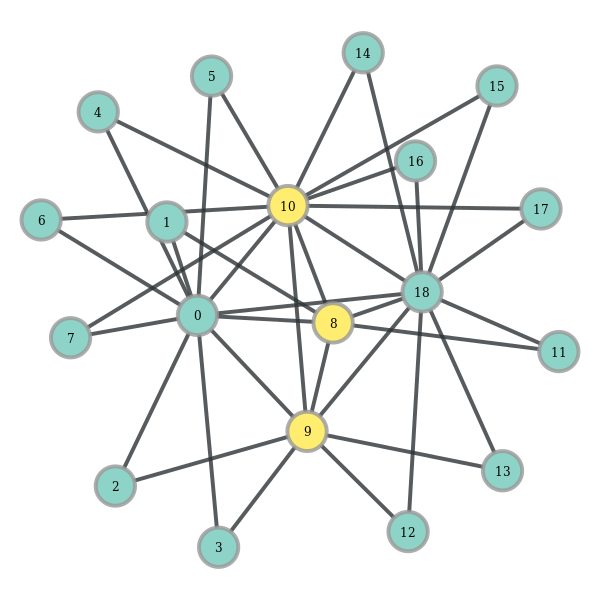

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45e80, at 0x7f5e34f455c0>

In [37]:
gt.draw.graph_draw(graph, vertex_fill_color=min_dominating_set(graph), vertex_text=graph.vertex_index, pos=pos)

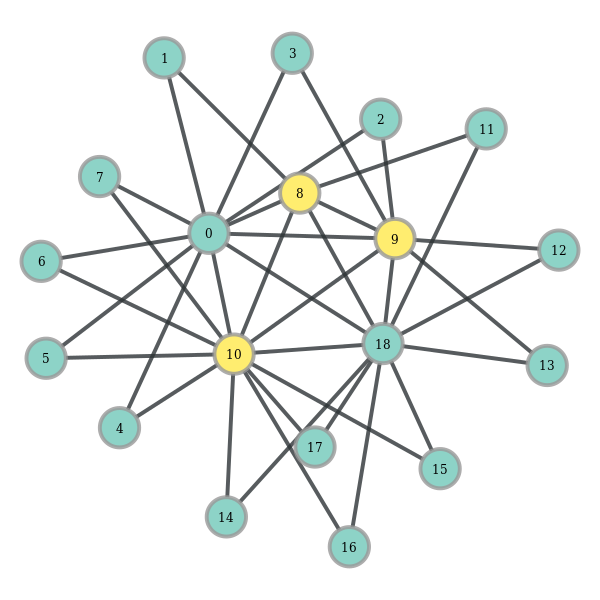

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45e80, at 0x7f5e34f455c0>

In [40]:
gt.draw.graph_draw(graph,vertex_fill_color=min_connected_dominating_set(graph), vertex_text=graph.vertex_index, pos=pos)

##### Exact Algorithm Results

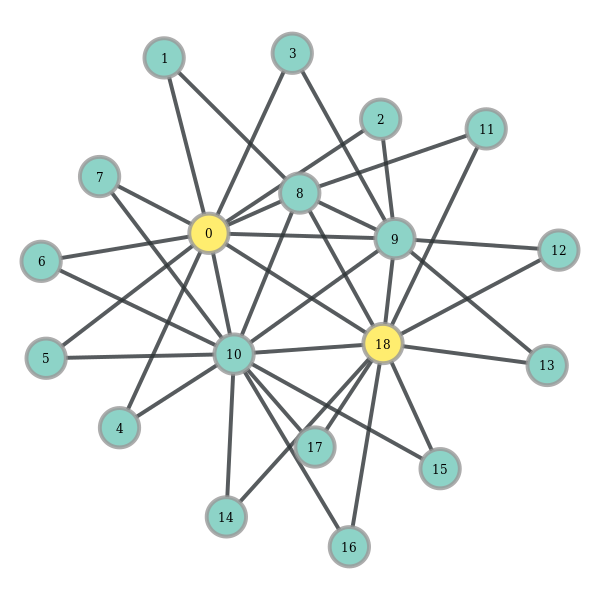

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45e80, at 0x7f5e34f455c0>

In [47]:
gt.draw.graph_draw(graph, vertex_fill_color=min_dominating_set(graph), vertex_text=graph.vertex_index, pos=pos)

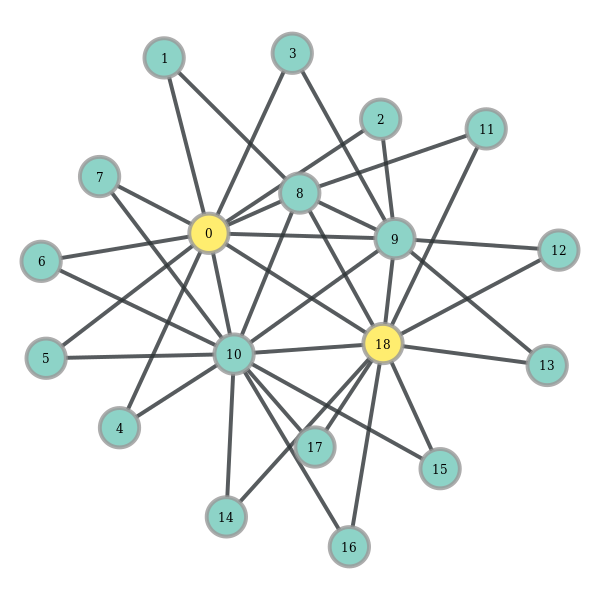

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45e80, at 0x7f5e34f455c0>

In [48]:
gt.draw.graph_draw(graph, vertex_fill_color=min_connected_dominating_set(graph), vertex_text=graph.vertex_index, pos=pos)

In [39]:
gt.draw.interactive_window(graph, pos=pos,vertex_fill_color=min_connected_dominating_set(graph), vertex_text=graph.vertex_index )

(<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f5e34f45e80, at 0x7f5e34f455c0>,
 <PropertyMap object with key type 'Vertex' and value type 'bool', for Graph 0x7f5e34f45e80, at 0x7f5e34f52dd8>)